In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../data/processed/gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.000000,Carpet area: 900 (83.61 sq.m.),2,2,1,4.0,West,Relatively New,NaN,NaN,NaN,900.0,0,0,0,0,0,0,28
1,flat,apna enclave,sector 3,0.50,7692.0,650.026001,Carpet area: 650 (60.39 sq.m.),2,2,1,1.0,West,Old Property,NaN,NaN,NaN,650.0,0,0,0,0,0,2,37
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.060994,Carpet area: 595 (55.28 sq.m.),2,2,3,12.0,NaN,New Property,NaN,NaN,NaN,595.0,0,0,0,0,0,0,36
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.000000,Carpet area: 1200 (111.48 sq.m.),2,2,2,2.0,NaN,Under Construction,NaN,NaN,NaN,1200.0,1,0,0,0,0,0,76
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.119139,Super Built up area 1345(124.95 sq.m.),2,2,3,5.0,NaN,Under Construction,NaN,1345.0,NaN,NaN,1,0,0,0,0,0,0


In [5]:
df.shape

(3678, 24)

In [6]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'noOfFloor', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'study room', 'servant room', 'store room', 'pooja room',
       'others', 'furnishing_type', 'luxury_score'],
      dtype='object')

/var/folders/cg/yjhl7qf96sz0r43qy394g0h40000gn/T/ipykernel_66011/2797181776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

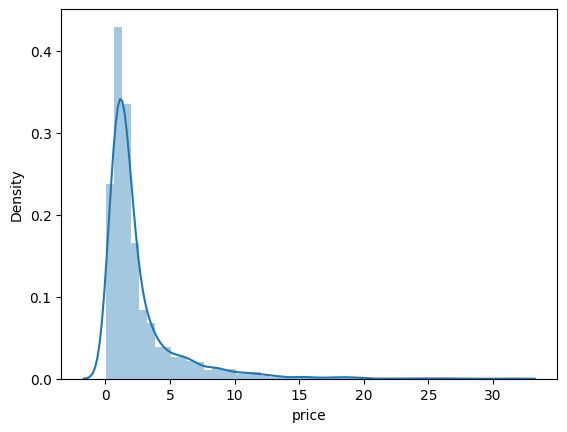

In [7]:
# outliers on the basis of price column
sns.distplot(df['price'])

<Axes: xlabel='price'>

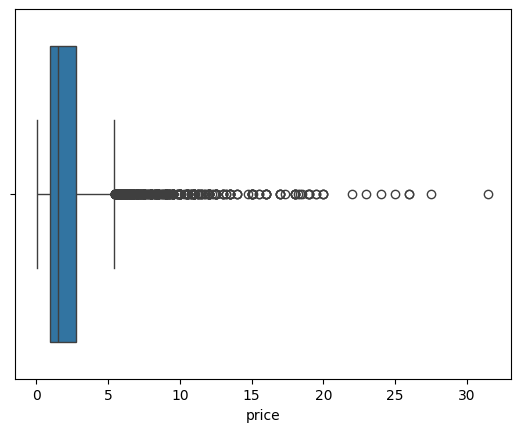

In [8]:
sns.boxplot(x=df['price'])

In [9]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [10]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3728,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.000000,Plot area 1000(836.13 sq.m.),7,9,3+,NaN,North-East,Moderately Old,3.0,NaN,9000.0,NaN,1,1,1,1,0,1,74
3485,house,independent,sector 43,27.50,24366.0,11286.218501,Plot area 1254(1048.5 sq.m.),6,7,3+,NaN,North-East,Relatively New,3.0,NaN,11286.0,NaN,1,1,0,1,1,2,42
3476,house,independent,sector 26,26.00,82540.0,3149.987885,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,NaN,North-West,New Property,4.0,NaN,400.0,350.0,1,1,1,1,0,1,72
3518,house,dlf city plots,sector 26,26.00,57206.0,4544.977800,Plot area 505(422.24 sq.m.),6,7,3+,NaN,North-East,New Property,2.0,NaN,4545.0,NaN,1,1,0,1,1,2,138
3667,house,suncity township,sector 54,25.00,31111.0,8035.742985,Plot area 1000(836.13 sq.m.),4,4,3+,NaN,North,Moderately Old,2.0,NaN,1000.0,NaN,1,1,1,1,0,0,0
3441,house,emaar the palm springs,sector 54,24.00,600000.0,400.000000,Plot area 400(37.16 sq.m.),5,5,2,NaN,North-East,Old Property,1.0,NaN,400.0,NaN,1,1,0,1,0,2,122
3653,house,independent,sector 26,23.00,25556.0,8999.843481,Plot area 1000(836.13 sq.m.),4,4,3+,NaN,South-West,Relatively New,2.0,NaN,9000.0,NaN,1,1,1,1,0,2,145
3459,house,vipul tatvam villa,sector 48,22.00,26667.0,8249.896876,Plot area 1000(836.13 sq.m.),5,6,3,NaN,NaN,Moderately Old,3.0,NaN,1000.0,NaN,0,1,0,0,0,0,54
2949,house,luxury dlf city floors,sector 26,20.00,48889.0,4090.899793,Plot area 500(418.06 sq.m.),16,16,3+,NaN,NaN,New Property,4.0,NaN,500.0,NaN,0,1,0,0,0,2,31
3434,house,dlf city plots,sector 26,20.00,44265.0,4518.242404,Plot area 502(419.74 sq.m.),16,20,3+,NaN,North-East,New Property,4.0,NaN,4518.0,NaN,1,1,1,1,0,2,153


In [11]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

### Price_per_sqft

/var/folders/cg/yjhl7qf96sz0r43qy394g0h40000gn/T/ipykernel_66011/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

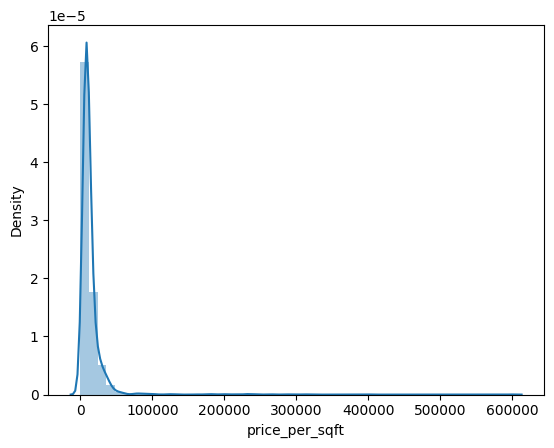

In [12]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

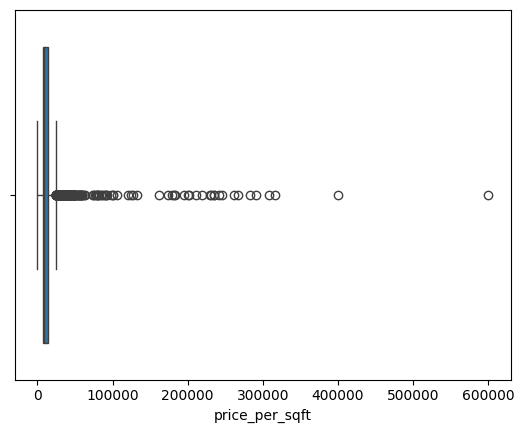

In [13]:
sns.boxplot(x=df['price_per_sqft'])

In [14]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [15]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

/var/folders/cg/yjhl7qf96sz0r43qy394g0h40000gn/T/ipykernel_66011/205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [16]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

/var/folders/cg/yjhl7qf96sz0r43qy394g0h40000gn/T/ipykernel_66011/3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [17]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.853107
std      12403.155600
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [18]:
df.update(outliers_sqft)

/var/folders/cg/yjhl7qf96sz0r43qy394g0h40000gn/T/ipykernel_66011/4262394064.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(outliers_sqft)
/var/folders/cg/yjhl7qf96sz0r43qy394g0h40000gn/T/ipykernel_66011/4262394064.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(outli

/var/folders/cg/yjhl7qf96sz0r43qy394g0h40000gn/T/ipykernel_66011/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

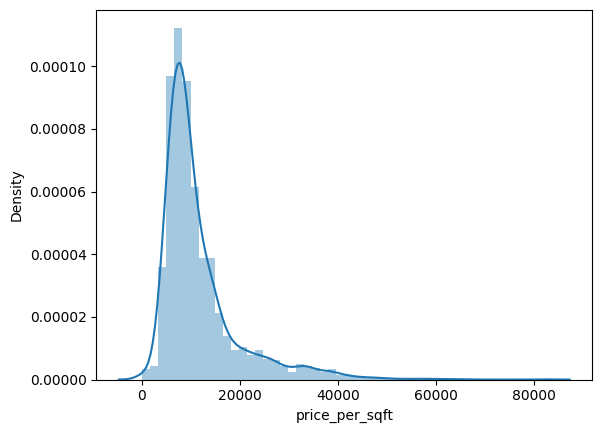

In [19]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

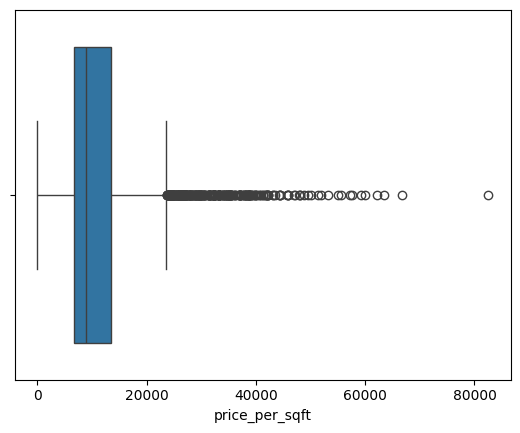

In [20]:
sns.boxplot(x=df['price_per_sqft'])

In [21]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2659,flat,unitech vistas,sector 70,9.00,57507.0,1565.026866,Built Up area: 1565 (145.39 sq.m.),3,3,0,7.0,NaN,Undefined,NaN,NaN,1565.0,NaN,0,0,0,0,0,0,0
3147,house,malibu towne,sector 47,8.50,53125.0,1600.000000,Built Up area: 1600 (148.64 sq.m.),12,12,3+,NaN,North,New Property,4.0,NaN,1600.0,NaN,0,0,0,0,0,2,99
3304,house,project housing board colony,sector 31,8.00,63492.0,1260.001260,Built Up area: 140 (117.06 sq.m.),2,1,0,NaN,NaN,Undefined,1.0,NaN,140.0,NaN,0,0,0,0,0,0,0
3418,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.000000,Plot area 1000(92.9 sq.m.),3,3,0,NaN,NaN,Moderately Old,1.0,NaN,1000.0,NaN,0,0,0,0,0,0,0
3433,house,independent,sector 26,14.75,51864.0,2843.976554,Plot area 316(264.22 sq.m.),16,20,3+,NaN,East,New Property,4.0,NaN,2844.0,NaN,1,1,1,1,0,2,153
3441,house,emaar the palm springs,sector 54,24.00,66667.0,3600.000000,Plot area 400(37.16 sq.m.),5,5,2,NaN,North-East,Old Property,1.0,NaN,400.0,NaN,1,1,0,1,0,2,122
3476,house,independent,sector 26,26.00,82540.0,3149.987885,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,NaN,North-West,New Property,4.0,NaN,400.0,350.0,1,1,1,1,0,1,72
3518,house,dlf city plots,sector 26,26.00,57206.0,4544.977800,Plot area 505(422.24 sq.m.),6,7,3+,NaN,North-East,New Property,2.0,NaN,4545.0,NaN,1,1,0,1,1,2,138
3616,house,emaar the palm springs,sector 54,14.00,62222.0,2250.008036,Plot area 250(209.03 sq.m.),4,5,3+,NaN,North,Old Property,2.0,NaN,2250.0,NaN,1,1,0,0,0,2,160
3680,house,emaar mgf marbella,sector 66,18.00,55556.0,3239.974080,Plot area 360(301.01 sq.m.),4,4,3+,NaN,East,Moderately Old,3.0,NaN,3240.0,NaN,1,1,0,1,0,1,75


In [22]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

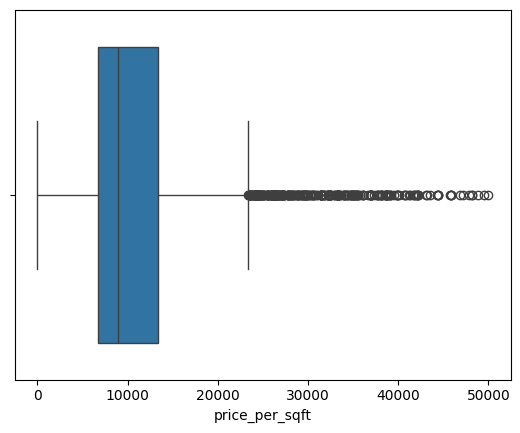

In [23]:
sns.boxplot(x=df['price_per_sqft'])

### Area

/var/folders/cg/yjhl7qf96sz0r43qy394g0h40000gn/T/ipykernel_66011/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

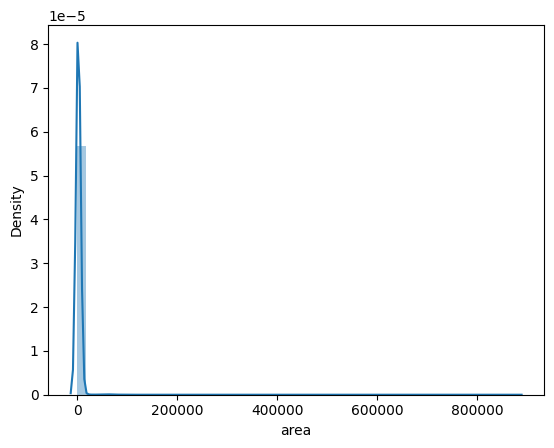

In [24]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

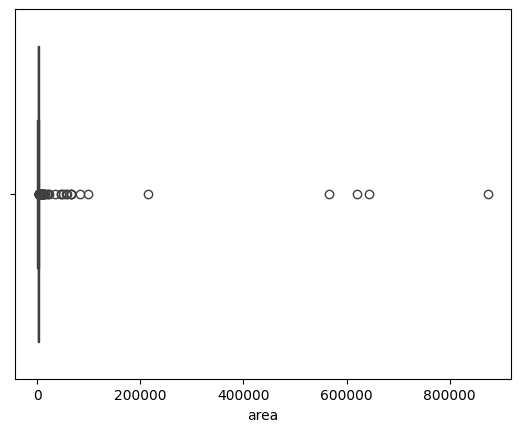

In [25]:
sns.boxplot(x=df['area'])

In [26]:
df['area'].describe()

count      3648.000000
mean       2947.343611
std       23205.025233
min         145.006344
25%        1262.020956
50%        1750.069488
75%        2349.960373
max      875000.000000
Name: area, dtype: float64

In [27]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
110,flat,signature the roselia,sector 95,0.45,7.0,642857.142857,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,NaN,569243.0,0,0,0,0,0,0,76
1291,flat,ramsons kshitij,sector 95,0.31,5.0,620000.000000,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,NaN,607936.0,1,0,0,0,1,0,65
1950,flat,signature global solera 2,sector 107,0.51,9.0,566666.666667,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,NaN,514396.0,0,0,0,0,0,0,44
2408,flat,hcbs sports ville,sohna road,0.35,4.0,875000.000000,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,NaN,737147.0,NaN,0,0,0,0,0,1,44
3253,house,independent,sector 50,5.00,232.0,215517.241379,Plot area 2(1011.71 sq.m.),6,5,3+,NaN,NaN,New Property,2.0,NaN,2.0,NaN,1,1,0,1,1,2,0


In [28]:
df = df[df['area'] < 100000]

/var/folders/cg/yjhl7qf96sz0r43qy394g0h40000gn/T/ipykernel_66011/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

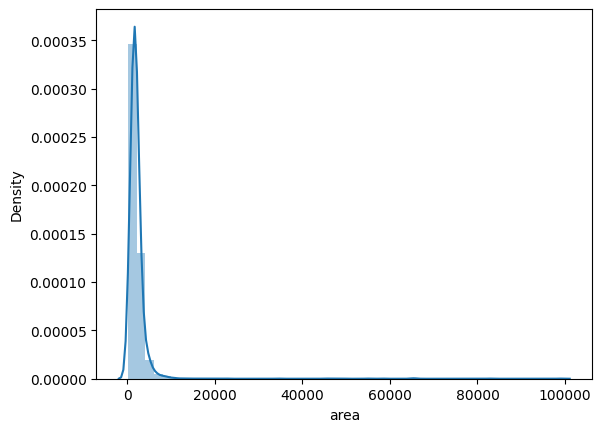

In [29]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

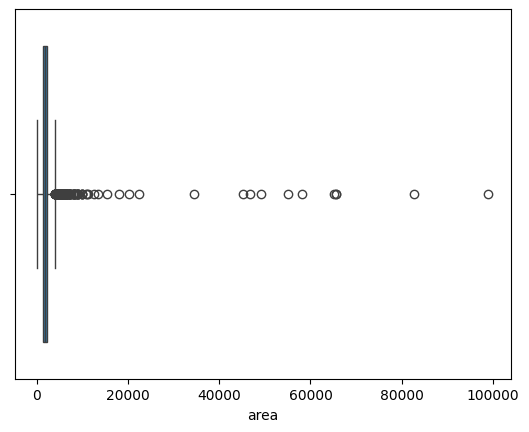

In [30]:
sns.boxplot(x=df['area'])

In [31]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# 3571, 2304, 1293, 79, 1292, 1415, 1289, 1294, 3042

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3571,house,independent,sector 26,18.40,1859.0,98977.945132,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,NaN,South,Relatively New,4.0,NaN,NaN,11000.00,0,1,1,1,0,2,60
3222,house,ganpati heights apartment,sector 13,1.25,151.0,82781.456954,Plot area 115(7692.86 sq.m.),10,6,2,NaN,South-East,Old Property,3.0,NaN,115.0,NaN,0,0,0,0,1,0,7
2304,flat,rof ananda,sector 95,0.38,58.0,65517.241379,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,NaN,64529.00,1,0,0,0,0,0,15
1293,flat,rof ananda,sector 95,0.38,58.0,65517.241379,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,NaN,64412.00,0,0,0,0,0,0,51
3294,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.044177,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,NaN,NaN,Undefined,1.0,NaN,NaN,7250.00,0,0,0,0,0,0,0
79,flat,pyramid elite,sector 86,0.46,79.0,58227.848101,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,NaN,58141.00,0,0,0,0,0,0,15
1292,flat,rof ananda,sector 95,0.33,60.0,55000.000000,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,NaN,54917.00,0,0,0,0,0,0,37
1415,flat,signature the serenas,sohna road,0.28,57.0,49122.807018,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,NaN,48811.00,1,0,0,0,0,0,37
3471,house,independent,sector 25,7.30,1560.0,46794.871795,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,NaN,North-West,Relatively New,3.0,NaN,5800.0,5200.00,0,1,1,0,0,2,109
1289,flat,ramsons kshitij,sector 95,0.24,53.0,45283.018868,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [32]:
df.drop(index=[3571, 2304, 1293, 79, 1292, 1415, 1289, 1294, 3042], inplace=True)

In [33]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3222,house,ganpati heights apartment,sector 13,1.25,151.0,82781.456954,Plot area 115(7692.86 sq.m.),10,6,2,NaN,South-East,Old Property,3.0,NaN,115.0,NaN,0,0,0,0,1,0,7
3294,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.044177,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,NaN,NaN,Undefined,1.0,NaN,NaN,7250.00,0,0,0,0,0,0,0
3471,house,independent,sector 25,7.30,1560.0,46794.871795,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,NaN,North-West,Relatively New,3.0,NaN,5800.0,5200.00,0,1,1,0,0,2,109
3049,house,independent,sector 57,6.25,2778.0,22498.200144,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,NaN,North-East,New Property,3.0,NaN,2660.0,2500.00,0,1,0,0,0,2,61
3533,house,independent,sector 43,5.50,2716.0,20250.368189,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,NaN,East,Moderately Old,3.0,NaN,2850.0,2250.00,1,1,0,1,1,2,123
2399,flat,godrej air,sector 85,2.50,1379.0,18129.079043,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,NaN,18122.00,1,0,0,1,1,2,44
3056,house,unitech aspen greens,sector 50,6.95,4490.0,15478.841871,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,NaN,North-East,Moderately Old,2.0,NaN,2160.0,1720.00,0,1,0,0,0,0,160
2801,flat,godrej icon,sector 88a,1.75,1384.0,12644.508671,Carpet area: 1175.11,3,3,3+,6.0,NaN,New Property,NaN,NaN,NaN,1175.11,0,0,0,0,0,0,55
3485,house,independent,sector 43,27.50,24366.0,11286.218501,Plot area 1254(1048.5 sq.m.),6,7,3+,NaN,North-East,Relatively New,3.0,NaN,11286.0,NaN,1,1,0,1,1,2,42
1622,flat,m3m golfestate,sector 65,13.20,12000.0,11000.000000,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,NaN,11000.00,0,1,0,0,0,0,60


In [34]:
df.loc[3222,'area'] = 1035
df.loc[3294,'area'] = 7250
df.loc[3471,'area'] = 5800
df.loc[3049,'area'] = 2660
df.loc[3533,'area'] = 2850
df.loc[2399,'area'] = 1812
df.loc[3056,'area'] = 2160
df.loc[2801,'area'] = 1175

/var/folders/cg/yjhl7qf96sz0r43qy394g0h40000gn/T/ipykernel_66011/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

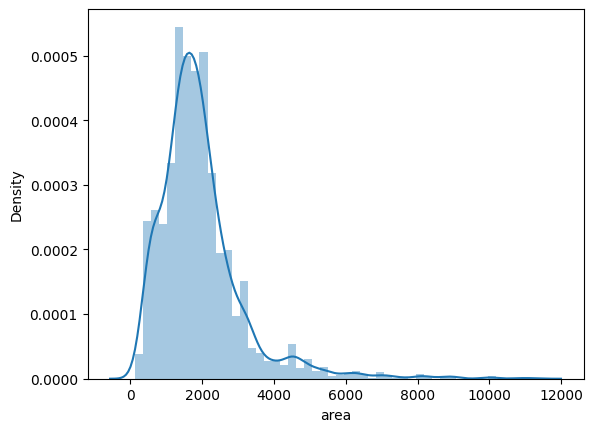

In [35]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

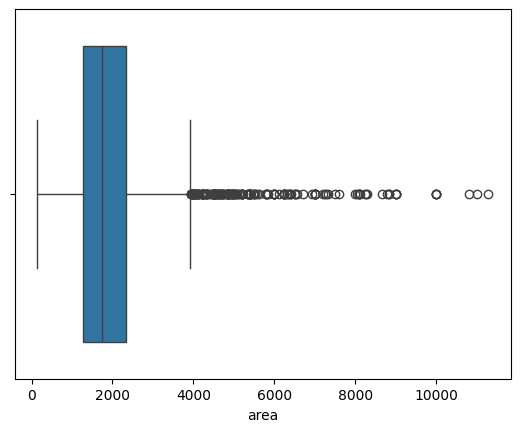

In [36]:
sns.boxplot(x=df['area'])

In [37]:
df['area'].describe()

count     3634.000000
mean      1950.249773
std       1215.590207
min        145.006344
25%       1260.274070
50%       1746.414403
75%       2325.217481
max      11286.218501
Name: area, dtype: float64

### Bedroom

/var/folders/cg/yjhl7qf96sz0r43qy394g0h40000gn/T/ipykernel_66011/1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

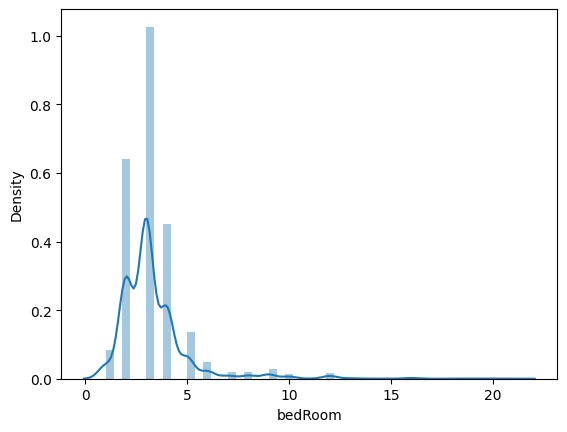

In [38]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

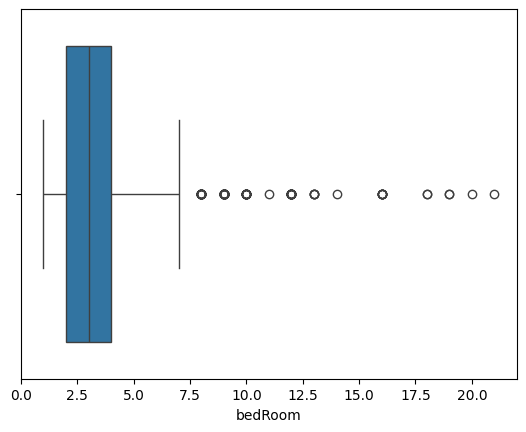

In [39]:
sns.boxplot(x=df['bedRoom'])

In [40]:
df['bedRoom'].describe()

count    3634.000000
mean        3.333242
std         1.829917
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [41]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2945,house,independent,sector 54,5.00,43066.0,1161.008684,Plot area 129(107.86 sq.m.),21,21,3+,NaN,North,Relatively New,5.0,NaN,1161.0,NaN,0,1,0,0,0,1,49
2947,house,independent,sector 43,4.50,39062.0,1152.014746,Plot area 128(107.02 sq.m.),20,20,3+,NaN,East,Relatively New,4.0,NaN,1152.0,NaN,0,1,0,0,0,1,22
3402,house,independent,sector 17a,3.87,5160.0,7500.000000,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,NaN,North-West,Relatively New,5.0,NaN,7500.0,NaN,1,0,1,0,0,0,68
3070,house,independent,sector 17a,3.93,24214.0,1623.028000,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,NaN,North-West,Relatively New,4.0,NaN,1622.0,NaN,1,1,1,1,0,0,74
3663,house,independent,sector 54,5.50,38194.0,1440.016757,Plot area 160(133.78 sq.m.),18,18,3+,NaN,South-West,Relatively New,4.0,NaN,1440.0,NaN,0,1,0,0,0,1,70
3050,house,private house,sector 55,7.05,46906.0,1503.006012,Plot area 167(139.63 sq.m.),18,18,3+,NaN,North-East,Relatively New,4.0,NaN,1503.0,NaN,0,0,0,0,1,1,57
3681,house,independent,sector 40,12.00,38986.0,3078.028010,Plot area 342(285.96 sq.m.),16,16,3+,NaN,NaN,New Property,4.0,NaN,3078.0,NaN,1,1,1,1,0,2,0
3643,house,independent,sector 55,9.19,34037.0,2700.002938,Plot area 300(250.84 sq.m.),16,18,2,NaN,West,New Property,4.0,NaN,2700.0,NaN,0,1,0,1,0,2,49
2981,house,independent,sector 110,13.50,50000.0,2700.000000,Plot area 300(250.84 sq.m.),16,16,3+,NaN,North-West,Relatively New,4.0,NaN,2700.0,NaN,1,1,0,1,1,0,41
2983,house,independent,sector 56,12.39,45889.0,2699.993462,Plot area 300(250.84 sq.m.),16,18,3+,NaN,North-East,New Property,4.0,NaN,2700.0,NaN,0,1,0,1,0,2,49


In [42]:
df = df[df['bedRoom'] <= 10]

In [43]:
df.shape

(3589, 24)

/var/folders/cg/yjhl7qf96sz0r43qy394g0h40000gn/T/ipykernel_66011/1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

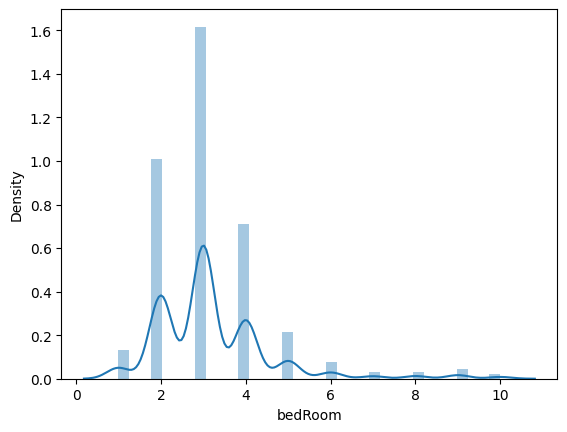

In [44]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

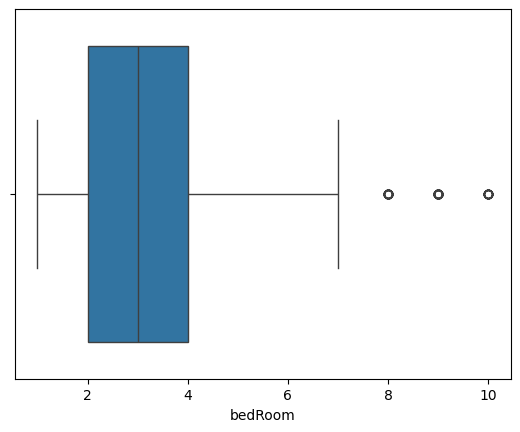

In [45]:
sns.boxplot(x=df['bedRoom'])

In [46]:
df['bedRoom'].describe()

count    3589.000000
mean        3.203399
std         1.393919
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

/var/folders/cg/yjhl7qf96sz0r43qy394g0h40000gn/T/ipykernel_66011/2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

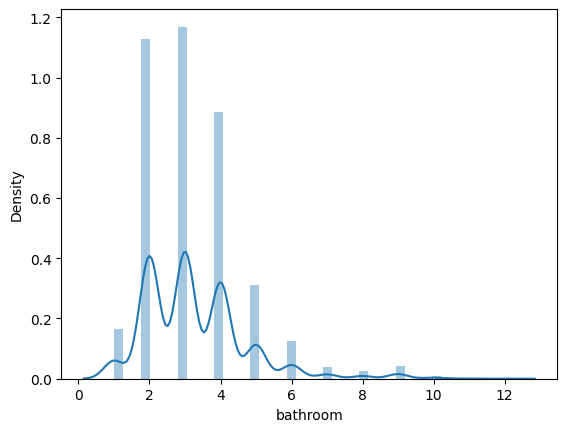

In [47]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

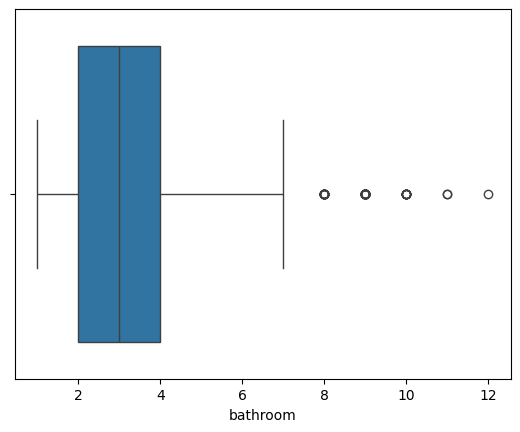

In [48]:
sns.boxplot(x=df['bathroom'])

In [49]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3379,house,adani brahma samsara,sector 60,18.02,28200.0,6390.070922,Built Up area: 6390 (593.65 sq.m.),9,12,3+,NaN,North-East,Relatively New,3.0,NaN,6390.0,NaN,0,1,0,0,0,2,146
3324,house,independent,sector 39,7.00,10000.0,7000.000000,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,NaN,South-East,Relatively New,4.0,NaN,7000.0,NaN,0,0,0,1,0,1,38
3378,house,independent,sector 24,11.00,28898.0,3806.491799,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,NaN,East,Old Property,3.0,NaN,5000.0,NaN,1,1,0,1,1,2,39


In [50]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.000000,Carpet area: 900 (83.61 sq.m.),2,2,1,4.0,West,Relatively New,NaN,NaN,NaN,900.0,0,0,0,0,0,0,28
1,flat,apna enclave,sector 3,0.50,7692.0,650.026001,Carpet area: 650 (60.39 sq.m.),2,2,1,1.0,West,Old Property,NaN,NaN,NaN,650.0,0,0,0,0,0,2,37
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.060994,Carpet area: 595 (55.28 sq.m.),2,2,3,12.0,NaN,New Property,NaN,NaN,NaN,595.0,0,0,0,0,0,0,36
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.000000,Carpet area: 1200 (111.48 sq.m.),2,2,2,2.0,NaN,Under Construction,NaN,NaN,NaN,1200.0,1,0,0,0,0,0,76
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.119139,Super Built up area 1345(124.95 sq.m.),2,2,3,5.0,NaN,Under Construction,NaN,1345.0,NaN,NaN,1,0,0,0,0,0,0


### super built up area

/var/folders/cg/yjhl7qf96sz0r43qy394g0h40000gn/T/ipykernel_66011/4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

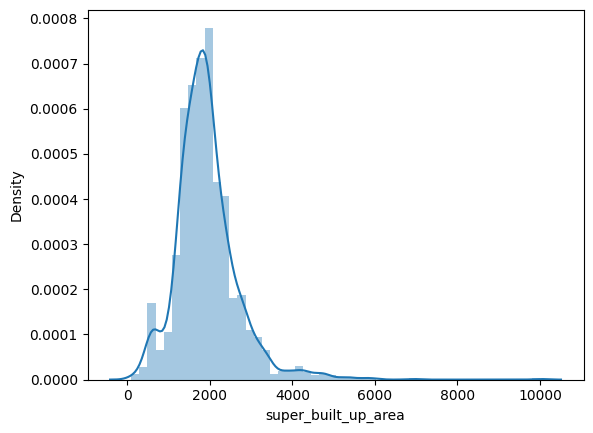

In [51]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

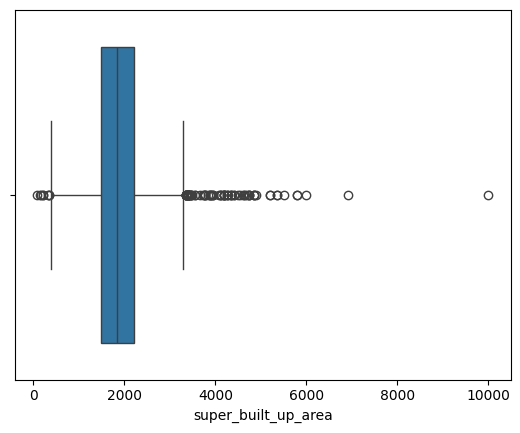

In [52]:
sns.boxplot(x=df['super_built_up_area'])

In [53]:
df['super_built_up_area'].describe()

count     1876.000000
mean      1924.930997
std        764.083802
min         89.000000
25%       1478.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [54]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
657,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.000000,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,NaN,10000.0,NaN,NaN,0,1,0,1,1,0,49
1528,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.024167,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,NaN,6926.0,NaN,NaN,0,1,0,0,0,2,140


### built up area

/var/folders/cg/yjhl7qf96sz0r43qy394g0h40000gn/T/ipykernel_66011/3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

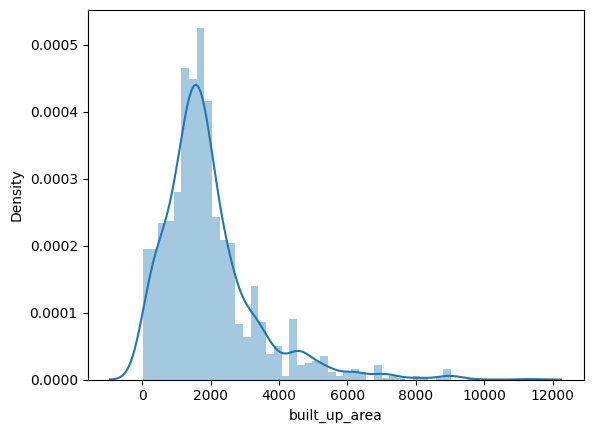

In [55]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

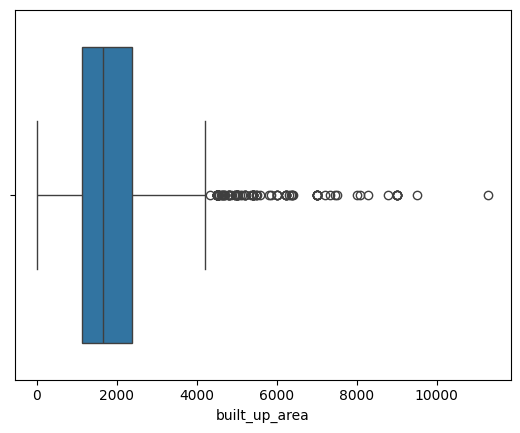

In [56]:
sns.boxplot(x=df['built_up_area'])

In [57]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3485,house,independent,sector 43,27.5,24366.0,11286.218501,Plot area 1254(1048.5 sq.m.),6,7,3+,NaN,North-East,Relatively New,3.0,NaN,11286.0,NaN,1,1,0,1,1,2,42


### carpet area

/var/folders/cg/yjhl7qf96sz0r43qy394g0h40000gn/T/ipykernel_66011/3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

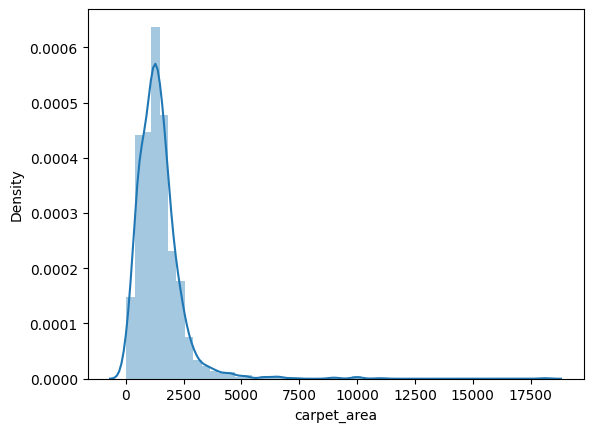

In [58]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

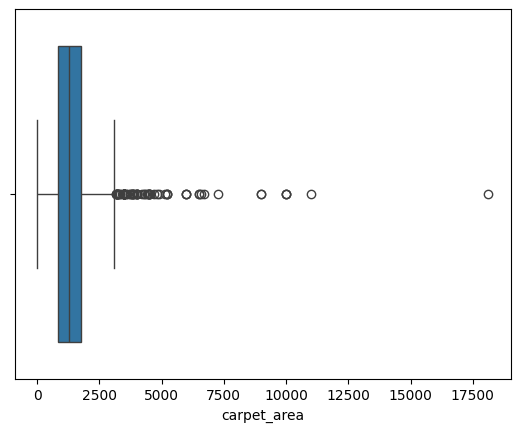

In [59]:
sns.boxplot(x=df['carpet_area'])

In [60]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1622,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,NaN,11000.0,0,1,0,0,0,0,60
2399,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,NaN,18122.0,1,0,0,1,1,2,44


In [61]:
df.loc[2399,'carpet_area'] = 1812

In [62]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1622,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [63]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.000000,Carpet area: 900 (83.61 sq.m.),2,2,1,4.0,West,Relatively New,NaN,NaN,NaN,900.0,0,0,0,0,0,0,28
1,flat,apna enclave,sector 3,0.50,7692.0,650.026001,Carpet area: 650 (60.39 sq.m.),2,2,1,1.0,West,Old Property,NaN,NaN,NaN,650.0,0,0,0,0,0,2,37
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.060994,Carpet area: 595 (55.28 sq.m.),2,2,3,12.0,NaN,New Property,NaN,NaN,NaN,595.0,0,0,0,0,0,0,36
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.000000,Carpet area: 1200 (111.48 sq.m.),2,2,2,2.0,NaN,Under Construction,NaN,NaN,NaN,1200.0,1,0,0,0,0,0,76
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.119139,Super Built up area 1345(124.95 sq.m.),2,2,3,5.0,NaN,Under Construction,NaN,1345.0,NaN,NaN,1,0,0,0,0,0,0


/var/folders/cg/yjhl7qf96sz0r43qy394g0h40000gn/T/ipykernel_66011/3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

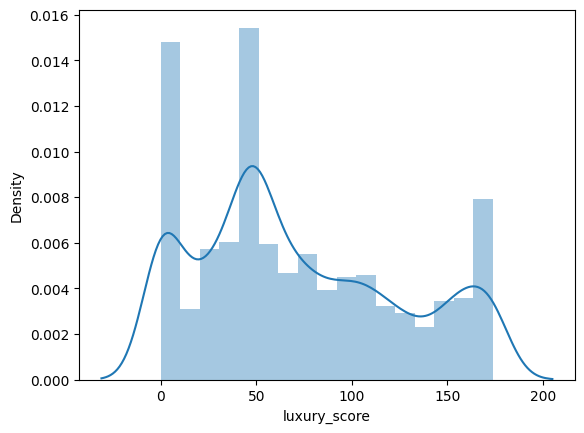

In [64]:
sns.distplot(df['luxury_score'])

<Axes: ylabel='luxury_score'>

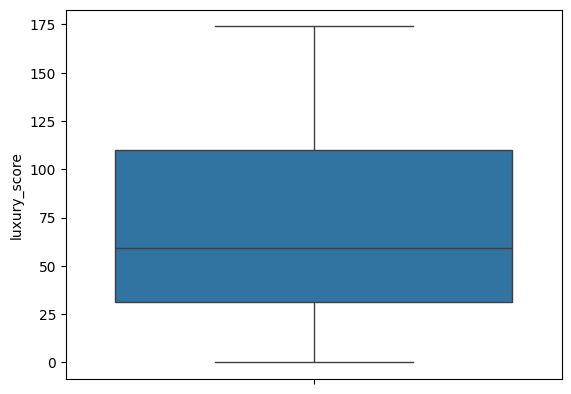

In [65]:
sns.boxplot(df['luxury_score'])

In [66]:
df.shape

(3589, 24)

In [67]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [68]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.000000,Carpet area: 900 (83.61 sq.m.),2,2,1,4.0,West,Relatively New,NaN,NaN,NaN,900.0,0,0,0,0,0,0,28
1,flat,apna enclave,sector 3,0.50,7692.0,650.026001,Carpet area: 650 (60.39 sq.m.),2,2,1,1.0,West,Old Property,NaN,NaN,NaN,650.0,0,0,0,0,0,2,37
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.060994,Carpet area: 595 (55.28 sq.m.),2,2,3,12.0,NaN,New Property,NaN,NaN,NaN,595.0,0,0,0,0,0,0,36
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.000000,Carpet area: 1200 (111.48 sq.m.),2,2,2,2.0,NaN,Under Construction,NaN,NaN,NaN,1200.0,1,0,0,0,0,0,76
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.119139,Super Built up area 1345(124.95 sq.m.),2,2,3,5.0,NaN,Under Construction,NaN,1345.0,NaN,NaN,1,0,0,0,0,0,0


/var/folders/cg/yjhl7qf96sz0r43qy394g0h40000gn/T/ipykernel_66011/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

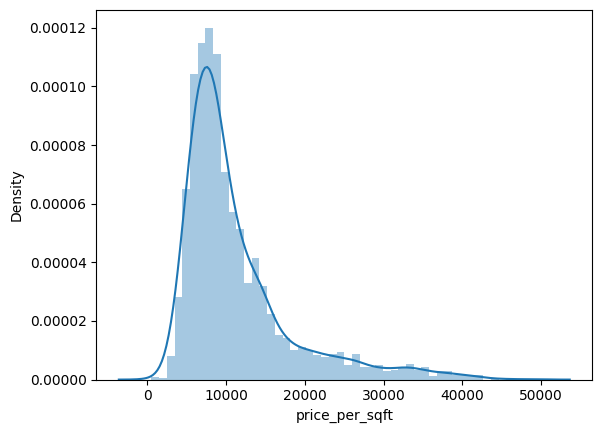

In [69]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

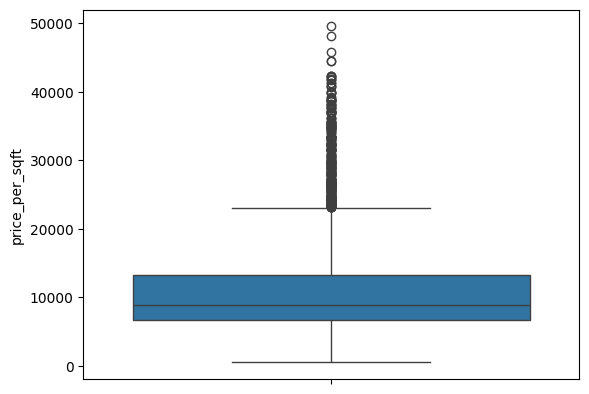

In [70]:
sns.boxplot(df['price_per_sqft'])

In [71]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3352,house,independent,sector 25,13.0,45710.0,2844.016627,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,NaN,2844.0,NaN,1,1,1,1,0,1,0
3395,house,independent,sector 105,9.9,49500.0,2000.000000,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,NaN,North,Undefined,3.0,NaN,2000.0,1800.0,0,0,0,0,0,0,0
3470,house,dlf city plots,sector 26,19.0,42054.0,4518.000666,Plot area 502(419.74 sq.m.),6,6,3,NaN,East,Relatively New,2.0,NaN,4518.0,NaN,1,1,0,0,0,2,121
3574,house,independent,sector 28,12.0,42194.0,2844.006257,Plot area 316(264.22 sq.m.),4,5,3+,NaN,East,Relatively New,4.0,NaN,2844.0,NaN,0,1,1,1,0,2,60
3580,house,independent,sector 26,20.0,44444.0,4500.045000,Plot area 500(418.06 sq.m.),5,7,3+,NaN,West,Relatively New,3.0,NaN,4500.0,NaN,0,1,0,1,0,1,97
3662,house,independent,sector 26,19.0,42222.0,4500.023684,Plot area 500(418.06 sq.m.),6,8,3+,NaN,East,Moderately Old,3.0,NaN,4500.0,NaN,1,1,1,1,0,2,103
3677,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.008308,Plot area 300(250.84 sq.m.),3,3,3+,NaN,North,New Property,4.0,NaN,2700.0,NaN,0,0,0,1,0,2,7
3691,house,independent,sector 43,9.5,42222.0,2250.011842,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,NaN,North-East,Relatively New,2.0,NaN,300.0,250.0,0,1,0,1,0,2,88
3796,house,independent,sector 55,5.0,44444.0,1125.011250,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,NaN,East,New Property,5.0,NaN,115.0,100.0,0,0,0,0,1,2,44


In [74]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

250.5243532975996

In [76]:
df[(df['area']/df['bedRoom'])<250]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
116,flat,czar mahira homes 63a,sector 63a,0.42,7407.0,567.031187,Carpet area: 567 (52.68 sq.m.),3,2,2,1.0,NaN,Undefined,NaN,NaN,NaN,567.000000,0,0,0,0,0,0,0
129,flat,mvn athens,sohna road,0.26,5397.0,481.749120,Carpet area: 481.74 (44.76 sq.m.),2,2,1,2.0,NaN,Relatively New,NaN,NaN,NaN,481.792164,0,0,0,0,0,0,37
198,flat,supertech basera,sector 79,0.36,7643.0,471.019233,Built Up area: 546 (50.73 sq.m.)Carpet area: 4...,2,2,1,4.0,NaN,New Property,NaN,NaN,546.0,471.000000,0,0,0,0,0,0,60
335,flat,mvn athens,sohna road,0.27,5897.0,457.859929,Carpet area: 457.81 (42.53 sq.m.),2,2,1,4.0,South-East,Relatively New,NaN,NaN,NaN,457.788667,0,0,0,0,1,2,35
560,flat,signature global solera,sector 107,0.27,5521.0,489.041840,Carpet area: 489 (45.43 sq.m.),2,2,2,0.0,North-East,Relatively New,NaN,NaN,NaN,489.000000,0,0,0,0,0,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3780,house,sector 38 rwa,sector 38,1.40,23932.0,584.990807,Plot area 65(54.35 sq.m.)Built Up area: 62 sq....,8,8,3,NaN,East,Moderately Old,4.0,NaN,62.0,60.000000,0,0,0,0,1,2,40
3790,house,sector 38 rwa,sector 38,4.30,28782.0,1493.989299,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,9,9,3+,NaN,East,Relatively New,3.0,NaN,165.0,164.000000,0,0,0,1,1,2,41
3796,house,independent,sector 55,5.00,44444.0,1125.011250,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,NaN,East,New Property,5.0,NaN,115.0,100.000000,0,0,0,0,1,2,44
3799,house,iffco nagar and 17b rwa,sector 17,2.98,20566.0,1448.993484,Plot area 161(134.62 sq.m.),6,6,3+,NaN,East,Relatively New,3.0,NaN,1449.0,NaN,1,0,0,1,0,0,78


In [77]:
df["area_room_ratio"] = df["area"]/df["bedRoom"]

In [79]:
df[df["area_room_ratio"] < 250]["bedRoom"].value_counts()

bedRoom
2     47
3     33
5     28
6     17
4     17
9     15
8     12
7      8
10     8
Name: count, dtype: int64

In [83]:
df = df[df["area_room_ratio"] > 100]

In [84]:
outliers_df = df[(df["area_room_ratio"] < 250) & (df["bedRoom"]>3)]

In [85]:
outliers_df = round(outliers_df["bedRoom"]/outliers_df["floorNum"])

In [ ]:
df.update(outliers_df)

In [ ]:
df["area_room_ratio"] = df["area"]/df["bedRoom"]

In [ ]:
outliers_df = df[(df["area_room_ratio"] < 250) & (df["bedRoom"]>4)]

In [86]:
df = df[~((df["area_room_ratio"] < 250) & (df["bedRoom"]>4))]